In [1]:
import matplotlib.pyplot as plt
import numpyro
import numpyro.distributions as dist
import numpyro_stein.stein.kernels as kernels
from numpyro_stein.stein.autoguides import AutoDelta
from numpyro_stein.util import init_with_noise
from numpyro_stein.stein.stein import SVGD
from numpyro_stein.stein.kernels import SteinKernel
from numpyro.infer import ELBO
from numpyro.infer.util import init_to_value
import seaborn as sns
import os
import jax
import jax.numpy as np
from random import randint

In [2]:
rng_key = jax.random.PRNGKey(randint(0, int(1e6)))
num_iterations = 6000

In [3]:
def model():
    numpyro.sample('x', dist.MultivariateNormal(loc=np.array([5., 10.]), covariance_matrix=[[3., 5.], 
                                                                                            [5., 10.]]))

In [4]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': np.array([-10., 30.])}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.RBFKernel(mode='vector'), num_stein_particles=100, num_loss_particles=3)
svgd_state = svgd.init(rng_key)

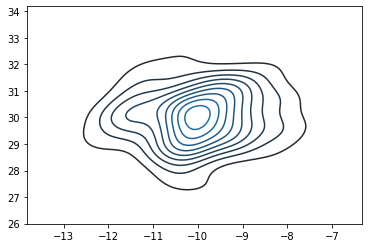

In [5]:
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'][:, 0], svgd.get_params(svgd_state)['auto_x'][:, 1])


In [6]:
svgd_state, loss = svgd.run(rng_key, num_iterations)

SVGD 3.6154: 100%|██████████| 6000/6000 [00:16<00:00, 362.27it/s]


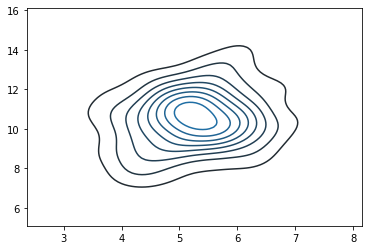

In [7]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'][:, 0], svgd.get_params(svgd_state)['auto_x'][:, 1])

In [8]:
svgd.get_params(svgd_state)['auto_x']

DeviceArray([[ 4.8483787,  8.693606 ],
             [ 4.7311864, 11.602359 ],
             [ 4.825875 ,  9.054332 ],
             [ 5.1616926,  8.768983 ],
             [ 5.2645283,  7.012288 ],
             [ 4.9612722, 10.198094 ],
             [ 5.486633 , 12.848838 ],
             [ 5.835716 ,  9.8979025],
             [ 4.525477 , 11.07928  ],
             [ 5.4070015, 11.350143 ],
             [ 5.6919665, 13.283631 ],
             [ 5.6262016, 11.506454 ],
             [ 4.0428166, 11.154587 ],
             [ 5.9424257,  9.549448 ],
             [ 5.3673997, 11.773339 ],
             [ 4.388958 , 10.032552 ],
             [ 6.263888 , 10.430527 ],
             [ 5.1267138, 10.396364 ],
             [ 4.8709583, 10.943474 ],
             [ 6.190857 , 10.230011 ],
             [ 3.7684577,  8.90943  ],
             [ 5.888261 , 10.001704 ],
             [ 5.5647917, 12.268377 ],
             [ 4.983257 , 10.906358 ],
             [ 3.980446 ,  8.838618 ],
             [ 4.915949 ,